# Heart disease prediction using Logistic Regression

## Data set
- we use a real heart disease dataset with various medical features.
- Each row is a patient record. There is a diagnosis column with 1 for disease and 0 for no disease.
- Exploring health data can teach us a lot about risk factors.
- Let us review the data to understand what we are working with.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = "D:\Data Science\Kaggle datasets\heart.csv"
df = pd.read_csv(file_path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
# top 5 rows of the dataset
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# shape of the dataset
df.shape

(1025, 14)

In [5]:
# missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# view summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Exploratory Data Analysis
- Good data analysis means plotting and looking for patterns.
- Visualizing the diagnosis target is a first step. Are there more healthy or unhealthy patients.
- Next we can plot some features to see how they relate to disease presence.

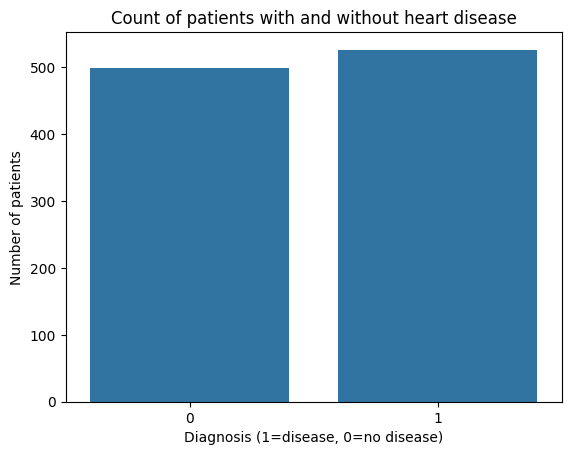

In [8]:
sns.countplot(data=df, x='target')
plt.title('Count of patients with and without heart disease')
plt.xlabel('Diagnosis (1=disease, 0=no disease)')
plt.ylabel('Number of patients')
plt.show()

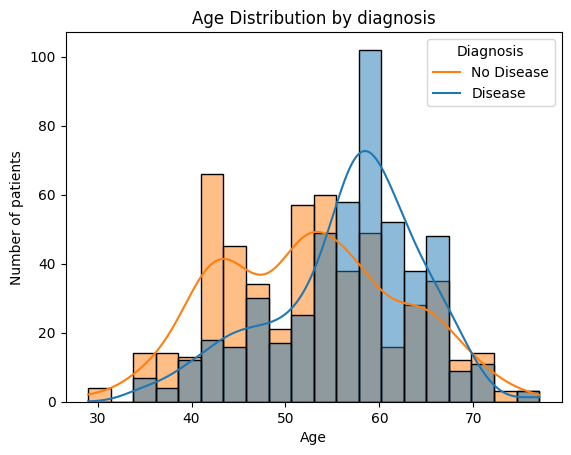

In [9]:
# Visualize a key numeric feature
sns.histplot(data=df, x='age', kde=True, hue='target', bins=20)
plt.title('Age Distribution by diagnosis')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.legend(['No Disease', 'Disease'], title='Diagnosis')
plt.show()

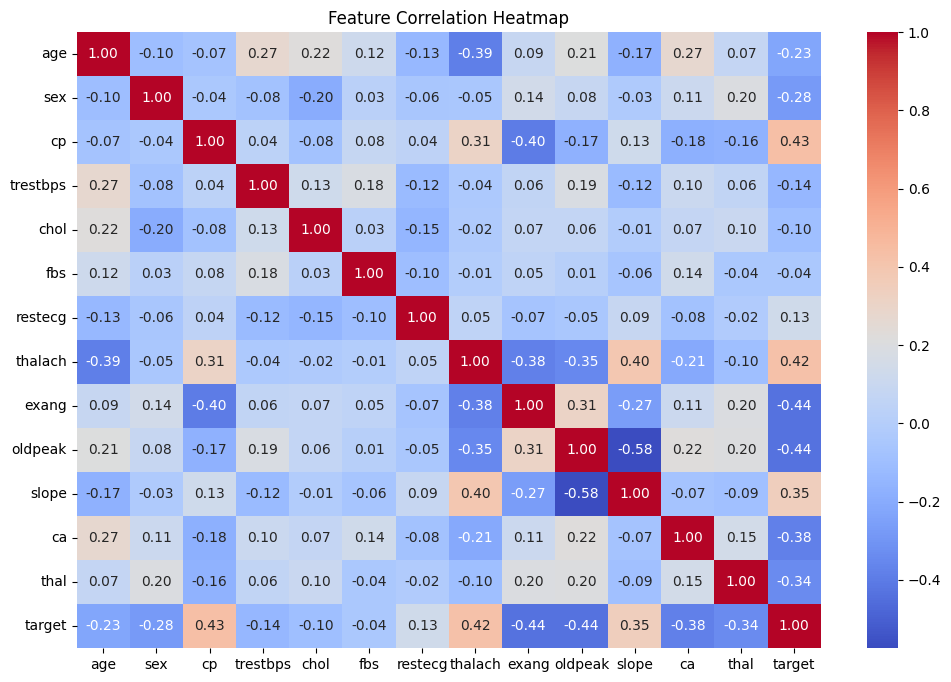

In [10]:
# Look for correlation between features
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Data preparation for Modeling
- Before training we need to split our data into input featues and target labels.
- We also divide the dataset so our model can learn from a part and then be tested on unseen data.
- For fair evaluation let us use a train test split and random state for repeatable results.

In [11]:
# split into features and target and then into training and test sets
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Train samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])

Train samples: 717
Test samples: 308


In [12]:
# scale data to standard range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression Model
- Logistic regression is a simple powerful for binary classification.
- It predicts the odds of a certain outcome here disease or no disease.
- We first train or fit the model to the training data.

In [13]:
# Train logistic regression model, initialize and train classifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

c:\Users\AL REHMAN LAPTOPS\miniconda3\envs\ex\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
# predict on test data
y_pred = model.predict(X_test_scaled)

c:\Users\AL REHMAN LAPTOPS\miniconda3\envs\ex\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [15]:
# measure model accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression model: {acc:.2f}')

Accuracy of Logistic Regression model: 0.79


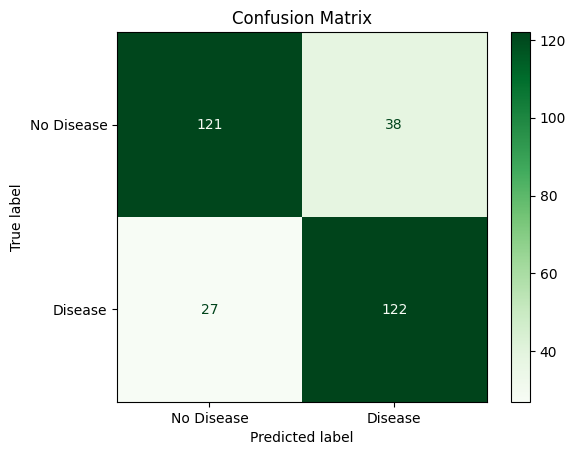

In [16]:
# show confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

              precision    recall  f1-score   support

  No Disease       0.82      0.76      0.79       159
     Disease       0.76      0.82      0.79       149

    accuracy                           0.79       308
   macro avg       0.79      0.79      0.79       308
weighted avg       0.79      0.79      0.79       308



## Try Prediction yourself
- You can enter patient featurs to estimate disease risk using this model.
- Let us use a test sample to see what prediction is made.

In [ ]:
sample_idx = int(input("Enter a test sample index from 0 to {}: ".format(X_test.shape[0]-1)))
sample_features = X_test.iloc[sample_idx]
sample_scaled = scaler.transform([sample_features])[0]
pred = model.predict([sample_scaled])[0]
print("Predicted for this patient:", "Disease" if pred == 1 else "No Disease")
print("Actual diagnosis:", "Disease" if y_test.iloc[sample_idx] == 1 else "No Disease")

## What did we learn?
- You imported health data, explored important features and practiced visualization.
- You prepared the data so the model could learn patterns safely and accurately. 
- You trained a Logistic Regression classifier to predict if a patient has heart disease.
- The models results can be measured by accuracy, confusion matrix and precision recall.
- You finally tried interactive prediction and model checking with new examples.
- This workflow is common for any binary classification in healthcare or any other fields.